In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction

**NumPy**, short for **Num**erical **Py**thon, is used in almost all numerical computation using Python. The `numpy`package provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.


> Many users use pandas to perform statistics and analytics over data, especially if rewpresented in tabular format. pandas provides some domain-specific functionalities like time series manipulation, not present in NumPy.

To use NumPy, you need to import the `numpy` module, using for example:

In [2]:
import numpy as np

This import style is quite standard; all objects and functions the `numpy` package will now be invoked with the `np.` prefix.

NumPy is designed for efficiency on large arrays of data, as the following code reports.

In [3]:
import numpy as np

np_array = np.arange(1000000)
p_list = list(range(1000000))

%time for _ in range(10): np_array = np_array * 2
%time for _ in range(10): p_list2 = [x * 2 for x in p_list]

CPU times: user 17.7 ms, sys: 17.3 ms, total: 35 ms
Wall time: 35.3 ms
CPU times: user 466 ms, sys: 163 ms, total: 630 ms
Wall time: 635 ms


# Creating arrays

In NumPy the key feature used for vectors, matrices and higher-dimensional data sets is the N-dimensional **array**, or **ndarray**. An array is a multi-dimensional container for homogeneous data, i.e., all elements must have the same type. 

There are a number of ways to initialize new NumPy arrays, for example
* from a Python list or tuples;
* using functions that are dedicated to generating `numpy` arrays, such as `arange`, `linspace`, etc.;
* reading data from files

## From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function:

In [178]:
v = np.array([1,2,3,4])

print(v)

[1 2 3 4]


In [179]:
M = np.array([[1, 2], [3, 4]])

print(M)

[[1 2]
 [3 4]]


The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [180]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their **shapes**. We can get information about the shape of an array by using the `ndarray.shape` property or, equivalently, by using the function `np.shape`:

In [181]:
print(v.shape)
print(np.shape(v))

print(M.shape)
print(np.shape(M))

(4,)
(4,)
(2, 2)
(2, 2)


Note that a `ndarray` of dimension 1 has a shape `(k,)` but it is considered as a vector with 1 row and k
columns.

The number of elements in the array is available through the `ndarray.size` property or, equivalently, by using the function `np.size`:

In [182]:
print(v.size)
print(np.size(v))

print(M.size)
print(np.size(M))

4
4
4
4


The number of dimensions in the array is available through the `ndarray.ndim` property or, equivalently, by using the function `np.ndim`:

In [183]:
print(v.ndim)
print(np.ndim(v))

print(M.ndim)
print(np.ndim(M))

1
1
2
2


So far an ndarray looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:
* Python lists are very general. They can contain *any kind of object*. They are *dynamically typed*. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would *not be very efficient* because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are **memory efficient**.

Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [184]:
print(M.dtype)

int64


We get an error if we try to assign a value of the wrong type to an element in a `numpy` array.

We can explicitly define the type of the array data when we create it, using the `dtype`keyword argument:

In [185]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

print(M)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


Common data types that can be used with dtype are: `int`, `float`, `complex`, `bool`, `object`, etc.
We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

You can explicitely convert of *cast* an array from a dtype to anothed using the `np.astype` function:

In [186]:
a = np.array([1, 2, 3, 4, 5])
print(a.dtype)
print(a)

fa = a.astype(np.float16)
print(fa.dtype)
print(fa)

int64
[1 2 3 4 5]
float16
[1. 2. 3. 4. 5.]


## Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

**arange**

In [187]:
x = np.arange(0, 10, 1) # arguments: start, stop, step
print(x)

y = np.arange(-1, 1, 0.1)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


**linspace** and **logspace**

In [188]:
x = np.linspace(0, 10, 25)
print(x)

y = np.logspace(0, 10, 10, base=np.e)
print(y)

[ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.        ]
[1.00000000e+00 3.03773178e+00 9.22781435e+00 2.80316249e+01
 8.51525577e+01 2.58670631e+02 7.85771994e+02 2.38696456e+03
 7.25095809e+03 2.20264658e+04]


**random** data

In [189]:
from numpy import random

# uniform random numbers in [0,1]
x = random.rand(5, 5)
print(x)

# standard normal distributed random numbers
y = random.randn(3, 3)
print(y)

[[0.93712811 0.74879012 0.38040147 0.539559   0.59775979]
 [0.63645827 0.26684308 0.7222307  0.25734948 0.06778759]
 [0.7688009  0.7098656  0.29127684 0.36333113 0.00132204]
 [0.96079942 0.42408265 0.64480219 0.39604629 0.42748111]
 [0.92139113 0.06411075 0.20393848 0.19149444 0.42697575]]
[[ 0.53384868 -1.77089385  1.47949756]
 [-0.87517459 -0.09204117 -0.49854636]
 [ 0.8640698   0.06710405 -0.26366291]]


**eye**, **diag**, **zeros** and **ones**

In [190]:
x = np.eye(3)
print(x)

x = np.diag([1,2,3])
print(x)

y = np.zeros((3,3))
print(y)

z = np.ones((3,3))
print(z)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


There are several NumPy functions for [creating arrays](https://docs.scipy.org/doc/numpy/user/quickstart.html#array-creation):

| Function | Description |
| ---: | :--- |
| `np.array(a)` | Create $n$-dimensional NumPy array from sequence `a` |
| `np.linspace(a,b,N)` | Create 1D NumPy array with `N` equally spaced values from `a` to `b` (inclusively)|
| `np.arange(a,b,step)` | Create 1D NumPy array with values from `a` to `b` (exclusively) incremented by `step`|
| `np.zeros(N)` | Create 1D NumPy array of zeros of length $N$ |
| `np.zeros((n,m))` | Create 2D NumPy array of zeros with $n$ rows and $m$ columns |
| `np.ones(N)` | Create 1D NumPy array of ones of length $N$ |
| `np.ones((n,m))` | Create 2D NumPy array of ones with $n$ rows and $m$ columns |
| `np.eye(N)` | Create 2D NumPy array with $N$ rows and $N$ columns with ones on the diagonal (ie. the identity matrix of size $N$) |

## Reading data from files

A very common file format for data files is *comma-separated values* (CSV), or related formats such as *tab-separated values* (TSV). To read data from such files into `numpy` arrays we can use the `np.genfromtxt` function. For example:

In [191]:
data = np.genfromtxt('data/stockholm_td_adj.tsv')

In [192]:
print(np.shape(data))

(77431, 7)


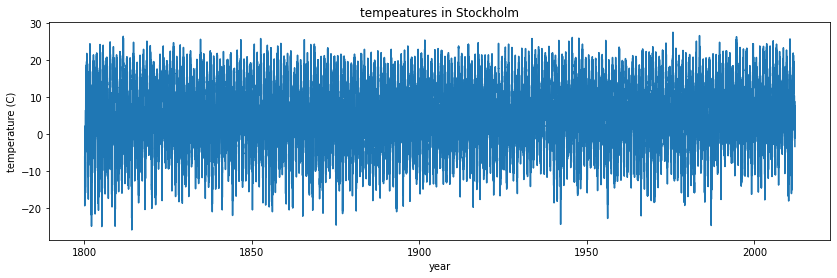

In [193]:
fig, ax = plt.subplots(figsize=(14,4))

ax.plot(data[:,0] + data[:,1]/12.0 + data[:,2]/365, data[:,5])

ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `np.savetxt` we can store a `numpy` array to a file in CSV format:

In [194]:
M = random.rand(3,3)

np.savetxt("data/random-matrix1.csv", M)

np.savetxt("data/random-matrix2.csv", M, fmt='%.5f') # fmt specifies the format

# Manipulating arrays

## Indexing

We can index elements in an array using square brackets and indices:

In [195]:
# v is a vector, and has only one dimension, taking one index
print(v[0])

# M is a matrix, or a 2 dimensional array, taking two indices 
print(M[1,1])

1
0.5091657737884723


If we omit an index of a multidimensional array it returns, in general, a N-1 dimensional array:

In [196]:
print(M)

print(M[1]) # row 1

[[0.54637072 0.61035093 0.5347052 ]
 [0.54705373 0.50916577 0.04862202]
 [0.63603638 0.87133417 0.41561053]]
[0.54705373 0.50916577 0.04862202]


The same thing can be achieved with using `:` instead of an index:

In [197]:
print(M[1,:]) # row 1
print(M[:,1]) # column 1

[0.54705373 0.50916577 0.04862202]
[0.61035093 0.50916577 0.87133417]


We can assign new values to elements in an array using indexing:

In [198]:
M[0,0] = 1
print(M)

# also works for rows and columns using lists or ndarrays
M[1,:] = [0, 0, 0]
print(M)

M[:,2] = np.array([-1, -1, -1])
print(M)

[[1.         0.61035093 0.5347052 ]
 [0.54705373 0.50916577 0.04862202]
 [0.63603638 0.87133417 0.41561053]]
[[1.         0.61035093 0.5347052 ]
 [0.         0.         0.        ]
 [0.63603638 0.87133417 0.41561053]]
[[ 1.          0.61035093 -1.        ]
 [ 0.          0.         -1.        ]
 [ 0.63603638  0.87133417 -1.        ]]


## Index slicing

**Index slicing** is the technical name for the syntax `M[lower:upper:step]` to extract parts of an array:

In [199]:
A = np.array([1, 2, 3, 4, 5])

print(A[1:3])

[2 3]


An important distinction between Python's lists and NumPy's arrays is that array slices are **views** on the original array. This means that no data is copied, and any modification to the view will be reflected by the original array. That is, **array slices are mutable**: if they are assigned a new value the original array from which the slice was extracted is modified:

In [200]:
A[1:3] = [-2,-3]

print(A)

[ 1 -2 -3  4  5]


If we want to avoid this behavior, so that when we get a new completely independent object B copied from A, then we need to do a so-called "**deep copy**" using the function `copy`:

In [238]:
B = np.copy(A)

We can omit any of the three parameters in `M[lower:upper:step]`:

In [201]:
print(A[::])  # lower, upper, step all take the default values
print(A[::2]) # step is 2, lower and upper defaults to the beginning and end of the array
print(A[:3])  # first three elements
print(A[3:])  # elements from index 3 to the end

[ 1 -2 -3  4  5]
[ 1 -3  5]
[ 1 -2 -3]
[4 5]


Negative indices counts from the end of the array (positive index from the begining):

In [202]:
A = np.array([1,2,3,4,5])

print(A[-1])
print(A[-3:])

5
[3 4 5]


Index slicing works exactly the same way for multidimensional arrays:

In [203]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])

print(A)

# a block from the original array
print(A[1:4, 1:4])

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[11 12 13]
 [21 22 23]
 [31 32 33]]


## Fancy indexing

**Fancy indexing** is the name for when an integer array or list is used in-place of an index:

In [204]:
row_indices = [1, 2, 3]
print(A[row_indices])

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [205]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
print(A[row_indices, col_indices])

[11 22 34]


Selecting data from an array by fancy indexing *always creates a copy fo the data*.

## Boolean indexing

We can also use **index masks**: if the index mask is an `numpy` array of data type `bool`, then an element is selected (`True`) or not (`False`) depending on the value of the index mask at the position of each element:

In [206]:
B = np.array([n for n in range(5)])
print(B)

row_mask = np.array([True, False, True, False, False])
print(B[row_mask])

# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
print(B[row_mask])

[0 1 2 3 4]
[0 2]
[0 2]


This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [207]:
x = np.arange(0, 10, 0.5)
print(x)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


In [208]:
mask = (5 < x) & (x < 7.5)
print(mask)

[False False False False False False False False False False False  True
  True  True  True False False False False False]


Selecting data from an array by boolean indexing *always creates a copy fo the data*.

> The Python keywords `not`, `and` and `or` do not work with boolean arrays. Use `~`, `&` and `|` instead.

In [209]:
print(x[mask])

[5.5 6.  6.5 7. ]


## Functions for extracting data from arrays and creating arrays

**where**: convert index mask to position index.

In [210]:
print(mask)
print(x[mask])

indices = np.where(mask)

print(indices)
print(x[indices]) # this indexing is equivalent to the fancy indexing x[mask]

[False False False False False False False False False False False  True
  True  True  True False False False False False]
[5.5 6.  6.5 7. ]
(array([11, 12, 13, 14]),)
[5.5 6.  6.5 7. ]


**diag**: extract the diagonal and subdiagonals of an array.

In [211]:
print(np.diag(A))
print(np.diag(A,-1))

[ 0 11 22 33 44]
[10 21 32 43]


**take**: similar to fancy indexing described above.

In [212]:
v2 = np.arange(-3,3)
print(v2)

row_indices = [1, 3, 5]
print(v2[row_indices]) # fancy indexing
print(v2.take(row_indices))

[-3 -2 -1  0  1  2]
[-2  0  2]
[-2  0  2]


# Linear algebra

**Vectorizing code** is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

## Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [213]:
print(v)
print(v * 2)

print(A)
print(2 * A)

[1 2 3 4]
[2 4 6 8]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]


## Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, **the default behaviour is element-wise operations**:

In [214]:
v1 = np.arange(0, 5)

print(v1 + v1) # element-wise addition
print(A * A) # element-wise multiplication

[0 2 4 6 8]
[[   0    1    4    9   16]
 [ 100  121  144  169  196]
 [ 400  441  484  529  576]
 [ 900  961 1024 1089 1156]
 [1600 1681 1764 1849 1936]]


## Broadcasting

The term **broadcasting** describes how `numpy` treats arrays with *different shapes* during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

`numpy` operations are usually done on pairs of arrays on an element-by-element basis:

In [215]:
print(A)
print(v1)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[0 1 2 3 4]


In [216]:
print(A.shape, v1.shape)

(5, 5) (5,)


In [217]:
print(A * v1)
print(v1 * A)

[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]
[[  0   1   4   9  16]
 [  0  11  24  39  56]
 [  0  21  44  69  96]
 [  0  31  64  99 136]
 [  0  41  84 129 176]]


When operating on two arrays, `numpy` compares their shapes element-wise. It starts with the **trailing dimension**, and works its way forward. Two dimensions are compatible when:

* they are equal, or
* one of them is 1.

Otherwise a `ValueError: frames are not aligned` exception is thrown.

**Examples**

In [218]:
x = np.array([1,2,3,4])
print(x.shape)

y = np.array([[10],[10],[10]])
print(y.shape)

print(x + y)

(4,)
(3, 1)
[[11 12 13 14]
 [11 12 13 14]
 [11 12 13 14]]


![Broadcasting](images/bc1.png)
![Broadcasting](images/bc2.png)

# Matrix Algebra

What about matrix mutiplication? There are two ways. We can either use the `np.dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments:

In [219]:
print(np.dot(v1, v1))
print(np.dot(A, v1))
print(np.dot(v1, A))
print(np.dot(A, A))

30
[ 30 130 230 330 430]
[300 310 320 330 340]
[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]


Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators +, -, * to use matrix algebra.

In [220]:
M = np.matrix(A)
print(M)

v = np.matrix(v1).T # make it a column vector
print(v)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[0]
 [1]
 [2]
 [3]
 [4]]


In [221]:
print(v.T * v) # v.T denotes the transpose of v
print(M * v)
print(M * M)

[[30]]
[[ 30]
 [130]
 [230]
 [330]
 [430]]
[[ 300  310  320  330  340]
 [1300 1360 1420 1480 1540]
 [2300 2410 2520 2630 2740]
 [3300 3460 3620 3780 3940]
 [4300 4510 4720 4930 5140]]


If we try to add, subtract or multiply objects with incomplatible shapes we get an error.

## Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing.

Other mathematical functions that transform matrix objects are:


In [222]:
C = np.matrix([[1j, 2j], [3j, 4j]])
print(C)

print(np.conjugate(C))

print(C.H)

print(np.real(C)) # same as: C.real

print(np.imag(C)) # same as: C.imag

print(np.abs(C))

print(np.angle(1 + C))

[[0.+1.j 0.+2.j]
 [0.+3.j 0.+4.j]]
[[0.-1.j 0.-2.j]
 [0.-3.j 0.-4.j]]
[[0.-1.j 0.-3.j]
 [0.-2.j 0.-4.j]]
[[0. 0.]
 [0. 0.]]
[[1. 2.]
 [3. 4.]]
[[1. 2.]
 [3. 4.]]
[[0.78539816 1.10714872]
 [1.24904577 1.32581766]]


## Matrix computations

**inverse**:

In [223]:
print(np.linalg.inv(C))

[[0.+2.j  0.-1.j ]
 [0.-1.5j 0.+0.5j]]


**determinant**:

In [224]:
print(np.linalg.det(C))

(2.0000000000000004+0j)


# Data processing

Often it is useful to store datasets in `numpy` arrays. `numpy` provides a number of functions to calculate statistics of datasets in arrays. These functions are called **universal functions**, or *ufunc*s, and they perform element-wise operations on data in ndarrays.

**sqrt** and **exp**:

In [232]:
print(np.sqrt(data[:10,2]))
print(np.exp(data[:10,2]))

[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


**mean**:

In [123]:
print(np.mean(data[:,3]))

6.197109684751585


**standard deviations** and **variance**:

In [125]:
print(np.std(data[:,3]), np.var(data[:,3]))

8.282271621340573 68.59602320966341


**min** and **max**:

In [233]:
print(data[:,3].min())
print(data[:,3].max())

-25.8
28.3


**argmin** and **argmax**:

In [237]:
a = np.array([1, 1, 6, 77, 8, 100, 4, 100])
print(a.argmax())
print(a.argmin())

5
0


**sum** and **prod**:

In [128]:
d = np.arange(0, 10)
print(d)

# sum up all elements
print(np.sum(d))
# product of all elements
print(np.prod(d + 1))
# cummulative sum
print(np.cumsum(d))
# cummulative product
print(np.cumprod(d + 1))

[0 1 2 3 4 5 6 7 8 9]
45
3628800
[ 0  1  3  6 10 15 21 28 36 45]
[      1       2       6      24     120     720    5040   40320  362880
 3628800]


The following table contains a list of the most important unary ufuncs.

|Function| Description |
|:-------|:---------|
|`abs`|Compute the absolute value element-wise for integer, floating-point, or complex values|
|`sqrt`|Compute the square root of each element|
|`exp`|Compute the exponent $e^x$ of each element|
|`log`, `log10`, `log2`, `log1p`|Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively|
|`sign`|Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)|
|`ceil`|Compute the ceiling of each element|
|`floor`|Compute the floor of each element|
|`modf`|Return fractional and integral parts of array as a separate array|
|`isnan`|Return boolean array indicating whether each value is `NaN` (Not a Number)|
|`cos`, `cosh`, `sin`, `sinh`, `tan`, `tanh`|Regular and hyperbolic trigonometric functions|
|`arccos`, `arccosh`, `arcsin`, `arcsinh`, `arctan`, `arctanh`|Inverse trigonometric functions|

The following table contains a list of the most important binary ufuncs.

|Function| Description |
|:-------|:---------|
|`add`|Element-wise addition|
|`subtract`|Element-wise subtraction|
|`multiply`|Element-wise multiplication|
|`divide`|Element-wise division|
|`mod`|Element-wise modulus|
|`power`|Raise elements in first array to powers indicated in second array |
|`maximum`, `fmax`|Element-wise maximum; `fmax` ignores `NaN`|
|`minimum`, `fmin`|Element-wise minimum; `fmin` ignores `NaN`|

## Calculations with higher-dimensional data

When functions such as min, max, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave:

In [131]:
M = np.random.rand(3,3)
print(M)

# global max
print(M.max())

# max in each column
print(M.max(axis=0))

# max in each row
print(M.max(axis=1))

[[0.75013982 0.25855643 0.20451342]
 [0.3395779  0.05939731 0.18313579]
 [0.41019777 0.84448317 0.73466085]]
0.8444831703244384
[0.75013982 0.84448317 0.73466085]
[0.75013982 0.3395779  0.84448317]


Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [135]:
print(A)
n, m = A.shape

[[ 5  5  5  5  5]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [136]:
B = A.reshape((1, n * m))
print(B)

[[ 5  5  5  5  5 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34 40 41 42 43
  44]]


In [138]:
B[0, 0:5] = 5 # modify the array
print(B)

[[ 5  5  5  5  5 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34 40 41 42 43
  44]]


In [139]:
print(A) # and the original variable is also changed. B is only a different view of the same data

[[ 5  5  5  5  5]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a **copy** of the data.

In [140]:
B = A.flatten()
print(B)

[ 5  5  5  5  5 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34 40 41 42 43
 44]


## Adding a new dimension

With `np.newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [146]:
v = np.array([1,2,3])
print(v.shape)

# make a column matrix of the vector v
w = v[:, np.newaxis]
print(w.shape)

# make a row matrix of the vector v
w = v[np.newaxis, :]
print(w.shape)

(3,)
(3, 1)
(1, 3)


## Stacking and repeating arrays

Using the functions `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones.

**tile** and **repeat**:

In [152]:
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


In [153]:
# repeat each element 3 times
print(np.repeat(a, 3))

[1 1 1 2 2 2 3 3 3 4 4 4]


In [154]:
# tile the matrix 3 times 
print(np.tile(a, 3))

[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


**concatenate**:

In [156]:
b = np.array([[5, 6]])
print(b)

[[5 6]]


In [158]:
print(np.concatenate((a, b), axis=0))

[[1 2]
 [3 4]
 [5 6]]


In [159]:
print(np.concatenate((a, b.T), axis=1))

[[1 2 5]
 [3 4 6]]


**hstack** and **vstack**:

In [160]:
print(np.vstack((a, b)))

[[1 2]
 [3 4]
 [5 6]]


In [161]:
print(np.hstack((a, b.T)))

[[1 2 5]
 [3 4 6]]


# Iterating over arrays

In general, **avoid iterating over the elements of arrays whenever possible (at all costs)**. The reason is that in a interpreted language like Python iterations are really slow compared to vectorized operations.